In [46]:
# Basic Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [24]:
df = pd.read_csv('data/raw.csv')

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and y variables

In [26]:
X = df.drop("math_score", axis=1)

In [27]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [28]:
y = df.math_score

In [29]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [30]:
print("Categories in 'gender' variable : ", end="")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable : ", end="")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable : ", end="")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable : ", end="")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable : ", end="")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable : ['female' 'male']
Categories in 'race_ethnicity' variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable : ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable : ['none' 'completed']


In [31]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)


In [32]:
# X = preprocessor.fit_transform(X)

In [36]:
#### Seprating the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train = preprocessor.fit_transform(X_train)

In [38]:
X_test = preprocessor.transform(X_test)

In [42]:
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Evaluate function to give all metrics after model training

In [44]:
def evaluate_model(true, predicted):
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square 

In [51]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBoost Regressor" : XGBRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))) :
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test datasets
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set")
    print("- Mean Absolute Error : {:.4f}".format(model_train_mae))
    print("- Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print("- R2 Score : {:.2f}".format(model_train_r2))

    print("----------------------------------------")

    print("Model Performance on Test set")
    print("- Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("- Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print("- R2 Score : {:.2f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print("="*35)
    print("\n")

Linear Regression
Model Performance for Training set
- Mean Absolute Error : 4.2076
- Root Mean Squared Error : 5.2936
- R2 Score : 0.88
----------------------------------------
Model Performance on Test set
- Mean Absolute Error : 4.5157
- Root Mean Squared Error : 5.5714
- R2 Score : 0.86


Lasso
Model Performance for Training set
- Mean Absolute Error : 5.1873
- Root Mean Squared Error : 6.5431
- R2 Score : 0.81
----------------------------------------
Model Performance on Test set
- Mean Absolute Error : 4.8878
- Root Mean Squared Error : 6.2998
- R2 Score : 0.82


Ridge
Model Performance for Training set
- Mean Absolute Error : 4.1928
- Root Mean Squared Error : 5.2848
- R2 Score : 0.88
----------------------------------------
Model Performance on Test set
- Mean Absolute Error : 4.5192
- Root Mean Squared Error : 5.5506
- R2 Score : 0.86


K-Neighbors Regressor
Model Performance for Training set
- Mean Absolute Error : 4.6458
- Root Mean Squared Error : 5.8237
- R2 Score : 0.85
-

#### Results

In [56]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model Name", "R2 Score"]).sort_values(by="R2 Score", ascending=False)

,Model Name,R2 Score
2,Ridge,0.861010
0,Linear Regression,0.859965
5,Random Forest Regressor,0.826115
1,Lasso,0.820960
7,AdaBoost Regressor,0.816669
6,XGBoost Regressor,0.815930
3,K-Neighbors Regressor,0.792582
4,Decision Tree,0.717902


In [58]:
#### Linear Regression
model = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.8599651119046502

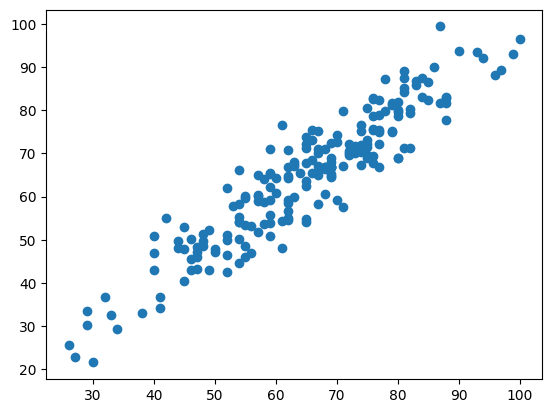

In [60]:
plt.scatter(x=y_test, y=y_pred)

<Axes: xlabel='math_score'>

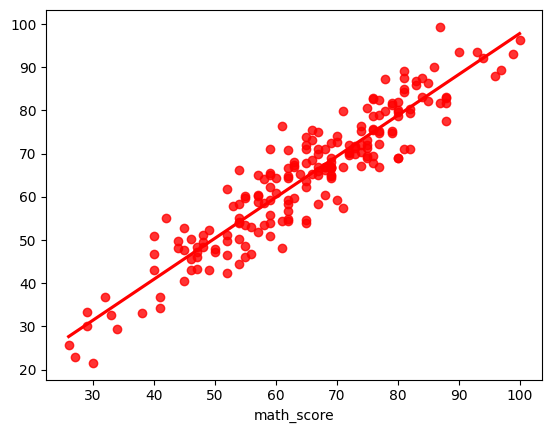

In [65]:
sns.regplot(x=y_test, y=y_pred, ci=None, color="red")

In [66]:
pd.DataFrame({"Actual Value" : y_test, "Predicted Value" : y_pred, "Difference" : y_test - y_pred})

,Actual Value,Predicted Value,Difference
316,77,75.335938,1.664062
227,57,58.851562,-1.851562
143,57,51.898438,5.101562
356,63,67.007812,-4.007812
523,54,54.210938,-0.210938
...,...,...,...
80,47,43.242188,3.757812
273,65,63.585938,1.414062
924,74,71.953125,2.046875
116,75,71.367188,3.632812
